**MACHINE LEARNING LAB - 05/08/2020 | SANDHYA M (1947139) -  3MCS**

**Lab Session 5 - Linear Discriminant Analysis (LDA)**

1. LDA is a dimensionality reduction technique used as a pre-processing step in ML and its applications of pattern classification.
2. Goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space.
3. Reduce resources and dimensional costs.
4. LDA tries to find a decision boundary around each cluster of a class.

Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes
<br><br><br>
<img src="LDA.png">


### Why Dimensionality Reduction?
It is possible to plot multi-dimensional data in just 2 or 3 dimensions with dimensionality reduction. It allows the data to be presented in an explicit manner which can be easily understood by a layman.

##### Steps for LDA:
1. Computing the d-dimensional mean vector
2. Computing Scatter Matrix - within and between class matrix
3. Generalized eigne values and eigen vectors
4. Sorting eigen values in decreasing
5. Plotting LDA components
6. Transforming the samples onto the new subspace

### Importing the required Libraries :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

### Dataset : Bank-Notes Genuinity (Kaggle)

Data values were extracted from images that were taken from genuine and forged banknote-like specimens

In [9]:
df = pd.read_csv ('data_banknote_authentication.csv')
df.tail()

,variance,skewness,kurtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [10]:
df.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
kurtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### We Use the LabelEncoder from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3.

In [13]:
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,[0,1,2,3]].values
y = df['class'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Fake Notes', 2: 'Genuine Notes'}

In [41]:
print(X)
print(y)

[[  3.6216   8.6661  -2.8073  -0.447 ]
 [  4.5459   8.1674  -2.4586  -1.4621]
 [  3.866   -2.6383   1.9242   0.1065]
 ...
 [ -3.7503 -13.4586  17.5932  -2.7771]
 [ -3.5637  -8.3827  12.393   -1.2823]
 [ -2.5419  -0.658    2.6842   1.1952]]
[1 1 1 ... 2 2 2]


### Step 1: Computing the d-dimensional mean vectors

In [14]:
mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector of Class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector of Class 1: [ 2.2767  4.2566  0.7967 -1.1476]

Mean Vector of Class 2: [-1.8684 -0.9936  2.1483 -1.2466]



### Step 2: Computing the Scatter Matrices

##### 2.1 Within-class scatter matrix 

In [16]:
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[  5258.339   -1333.6414  -4499.5048   2127.6972]
 [ -1333.6414  37886.4429 -24885.8881  -9073.929 ]
 [ -4499.5048 -24885.8881  24849.3223   4003.7394]
 [  2127.6972  -9073.929    4003.7394   6048.6247]]


###### 2.2 Between-class scatter matrix 

In [44]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 5.8211e+03  7.3730e+03 -1.8980e+03  1.3903e+02]
 [ 7.3730e+03  9.3386e+03 -2.4040e+03  1.7609e+02]
 [-1.8980e+03 -2.4040e+03  6.1887e+02 -4.5332e+01]
 [ 1.3903e+02  1.7609e+02 -4.5332e+01  3.3205e+00]]


 ### Step 3:  Generalized eigenvalue and eigenvectors for the matrix to obtain the linear discriminants :

In [60]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[0.7434]
 [0.4082]
 [0.5298]
 [0.0042]]
Eigenvalue 1: 6.40e+00

Eigenvector 2: 
[[-0.4578]
 [ 0.5426]
 [ 0.7042]
 [ 0.0055]]
Eigenvalue 2: -8.88e-16

Eigenvector 3: 
[[0.1679]
 [0.1187]
 [0.9782]
 [0.0301]]
Eigenvalue 3: 8.09e-16

Eigenvector 4: 
[[-0.0229]
 [ 0.0135]
 [ 0.0554]
 [ 0.9981]]
Eigenvalue 4: 6.33e-19


### Step 4: Sorting the eigenvectors by decreasing eigenvalues
In order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.

In [76]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

6.399320281526574
8.881784197001252e-16
8.094933682269689e-16
6.32624874369013e-19


### Plot main LDA components

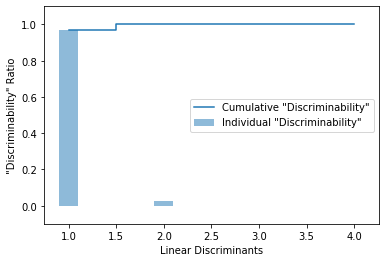

In [80]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='Individual "Discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='Cumulative "Discriminability"')
plt.ylabel('"Discriminability" Ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

##### 4.1 “Explained Variance” as percentage:

In [81]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


##### 4.2. Choosing k eigenvectors with the largest eigenvalues

In [82]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.7434 -0.4578]
 [ 0.4082  0.5426]
 [ 0.5298  0.7042]
 [ 0.0042  0.0055]]


### Step 5: Transforming the samples onto the new subspace


##### Transform our samples onto the new subspace

In [83]:
X_lda = X.dot(W)
assert X_lda.shape == (df.shape[0],2), "The matrix is not 1372x2 dimensional."

##### Plotting and Visualizing the Results

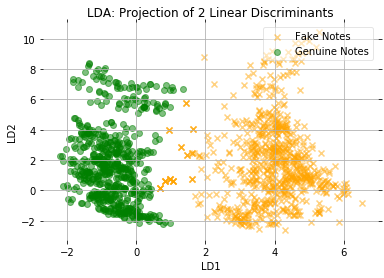

In [84]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('x', 'o'),('orange', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Projection of 2 Linear Discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="on", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

### Difference between LDA and PCA

| LDA      | PCA |
| :---        |    :----:   |         
| Supervised Learning   | Unsupervised Learning       |
| Dependent & Independent variables  | Independent variables  |
| Varible reduction - based on strenth between independent & dependent variables    |     Variable reduction based on collinearity of independent variables |
| Prediction of classes |
| Finds the direction that maximizes differnce between 2 classes  | Finds direction that maximizes the variance in the data | 


### Applications of LDA
Some of the practical applications of LDA are listed below:

#### 1. Face Recognition 
1. Reduce the number of attributes to a more manageable number before the actual classification. 
2. The dimensions that are generated are a linear combination of pixels that forms a template. 
3. These are called Fisher’s faces.

#### 2. Medical 
1. You can use LDA to classify the patient disease as mild, moderate or severe. 
2. The classification is done upon the various parameters of the patient and his medical trajectory. 

#### 3. Customer Identification
1. Identify and select the features if the group of customers that are most likely to buy the product in the shopping mall. 

=========================================================================================== Sandhya M (1947139) | ML Lab 05